# 3 Layer CNN Handwriting Text Recognition

Inspiration was based on https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr

Dataset from: https://www.kaggle.com/datasets/landlord/handwriting-recognition

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  1


In [2]:
tf.config.experimental.set_memory_growth(gpus[0],True)

In [3]:
!pip install imutils

  Using cached imutils-0.5.4-py3-none-any.whl


In [3]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import re
import os
import random 
import cv2
import imutils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [4]:
train_dir = r'(your drive name):/(your name)/(your folder)/(your folder)/Train'
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(train_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(train_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [5]:
len(train_data)

140000

In [6]:
val_dir = r'(your drive name):/(your name)/(your folder)/(your folder)\Validation'
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [7]:
len(val_data)

15209

In [8]:
random.shuffle(train_data)
random.shuffle(val_data)

In [9]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [10]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [11]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [12]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [13]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [14]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [15]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [16]:
#3 Layer CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [19]:
history = model.fit(train_X,train_Y, epochs=60, batch_size=128, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/60
1094/1094 [==============================] - 14s 8ms/step - loss: 1.2282 - accuracy: 0.6385 - val_loss: 0.7016 - val_accuracy: 0.8409
Epoch 2/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.3398 - accuracy: 0.8808 - val_loss: 0.6347 - val_accuracy: 0.8557
Epoch 3/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.2826 - accuracy: 0.8982 - val_loss: 0.6281 - val_accuracy: 0.8532
Epoch 4/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2548 - accuracy: 0.9073 - val_loss: 0.6271 - val_accuracy: 0.8751
Epoch 5/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.2378 - accuracy: 0.9119 - val_loss: 0.6306 - val_accuracy: 0.8675
Epoch 6/60
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2200 - accuracy: 0.9182 - val_loss: 0.5957 - val_accuracy: 0.8659
Epoch 7/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.2097 - accuracy: 0.9209 - val_loss: 0.6288 - val_accuracy

1094/1094 [==============================] - 7s 7ms/step - loss: 0.1081 - accuracy: 0.9556 - val_loss: 0.9744 - val_accuracy: 0.8827
Epoch 58/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1079 - accuracy: 0.9557 - val_loss: 0.9309 - val_accuracy: 0.8707
Epoch 59/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1100 - accuracy: 0.9544 - val_loss: 0.9669 - val_accuracy: 0.8826
Epoch 60/60
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1057 - accuracy: 0.9561 - val_loss: 0.9260 - val_accuracy: 0.8799


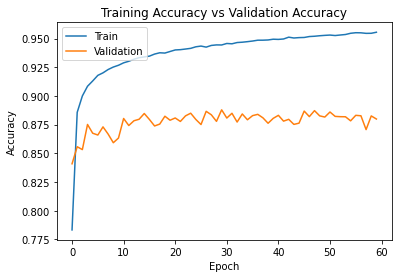

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

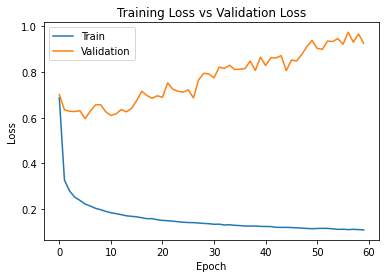

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(val_X, val_Y)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

476/476 [==============================] - 1s 3ms/step - loss: 0.9260 - accuracy: 0.8799
Test Loss: 0.9259833097457886
Test Accuracy: 0.8798737525939941


In [24]:
y_pred = model.predict(val_X, verbose=1, batch_size=128)

119/119 [==============================] - 0s 2ms/step


In [25]:
y_pred

array([[6.4422409e-16, 7.0301567e-18, 3.1932549e-16, ..., 1.4697480e-13,
        1.6836949e-18, 4.6923728e-19],
       [2.8044671e-26, 1.0472811e-19, 9.9025959e-22, ..., 4.7919026e-17,
        2.3832353e-12, 3.4601302e-22],
       [1.0552689e-21, 1.6072774e-28, 2.8571234e-24, ..., 4.8663607e-33,
        1.1788569e-26, 1.6153197e-25],
       ...,
       [5.6588729e-09, 6.3506103e-01, 4.7238949e-08, ..., 5.8714344e-10,
        4.8175433e-08, 5.5476185e-10],
       [8.6105315e-13, 3.9896801e-12, 2.2172405e-11, ..., 3.2197317e-05,
        1.7546994e-07, 3.2330402e-10],
       [3.0545675e-09, 1.9063082e-12, 2.5664487e-14, ..., 9.1812871e-19,
        3.6013022e-13, 3.6269953e-16]], dtype=float32)

In [26]:
##for i in y_pred:
 #   print(i)

In [27]:
#rounded_y_pred = model.predict_classes(val_X, verbose=1, batch_size=128)

In [28]:
#for i in rounded_y_pred:
 #   print(i)

In [29]:
#new_y_pred = (y_pred > 0.5)

In [30]:
#new_y_pred

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(accuracy_score(val_Y.argmax(axis=1), y_pred.argmax(axis=1)))

0.8798737589585114


In [32]:
print(classification_report(val_Y.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       368
           1       0.93      0.75      0.83      1000
           2       0.93      0.96      0.94      1000
           3       0.99      0.99      0.99      1000
           4       0.95      0.99      0.97      1000
           5       0.99      0.98      0.98      1000
           6       0.96      0.98      0.97      1000
           7       0.95      0.98      0.97       190
           8       0.98      0.97      0.98      1000
           9       0.90      0.92      0.91      1000
          10       0.89      0.36      0.51       392
          11       0.95      0.89      0.92       385
          12       0.60      0.98      0.75       168
          13       0.95      0.55      0.70       322
          14       0.92      0.56      0.70       308
          15       0.85      0.97      0.90       324
          16       0.78      0.79      0.78       363
          17       0.92    

In [33]:
#cm = confusion_matrix(val_Y.argmax(axis=1),rounded_y_pred)
#print(cm)

In [34]:
cm=confusion_matrix(val_Y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[362   0   0 ...   0   0   0]
 [  0 748   0 ...   0   0   0]
 [  0   0 958 ...   1   1  29]
 ...
 [  0   0   0 ... 113   1   1]
 [  0   0   0 ...   1 176   0]
 [  0   0  15 ...   1   0 163]]


In [36]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
        
    #labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    #labels = np.asarray(labels).reshape(2,2)

    #sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
     #           xticklabels = categories, yticklabels = categories)

    plt.tight_layout()
    plt.xlabel("Predicted values", fontdict = {'size':18}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':18}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':30}, pad = 20)

Confusion matrix, without normalization
[[362   0   0 ...   0   0   0]
 [  0 748   0 ...   0   0   0]
 [  0   0 958 ...   1   1  29]
 ...
 [  0   0   0 ... 113   1   1]
 [  0   0   0 ...   1 176   0]
 [  0   0  15 ...   1   0 163]]


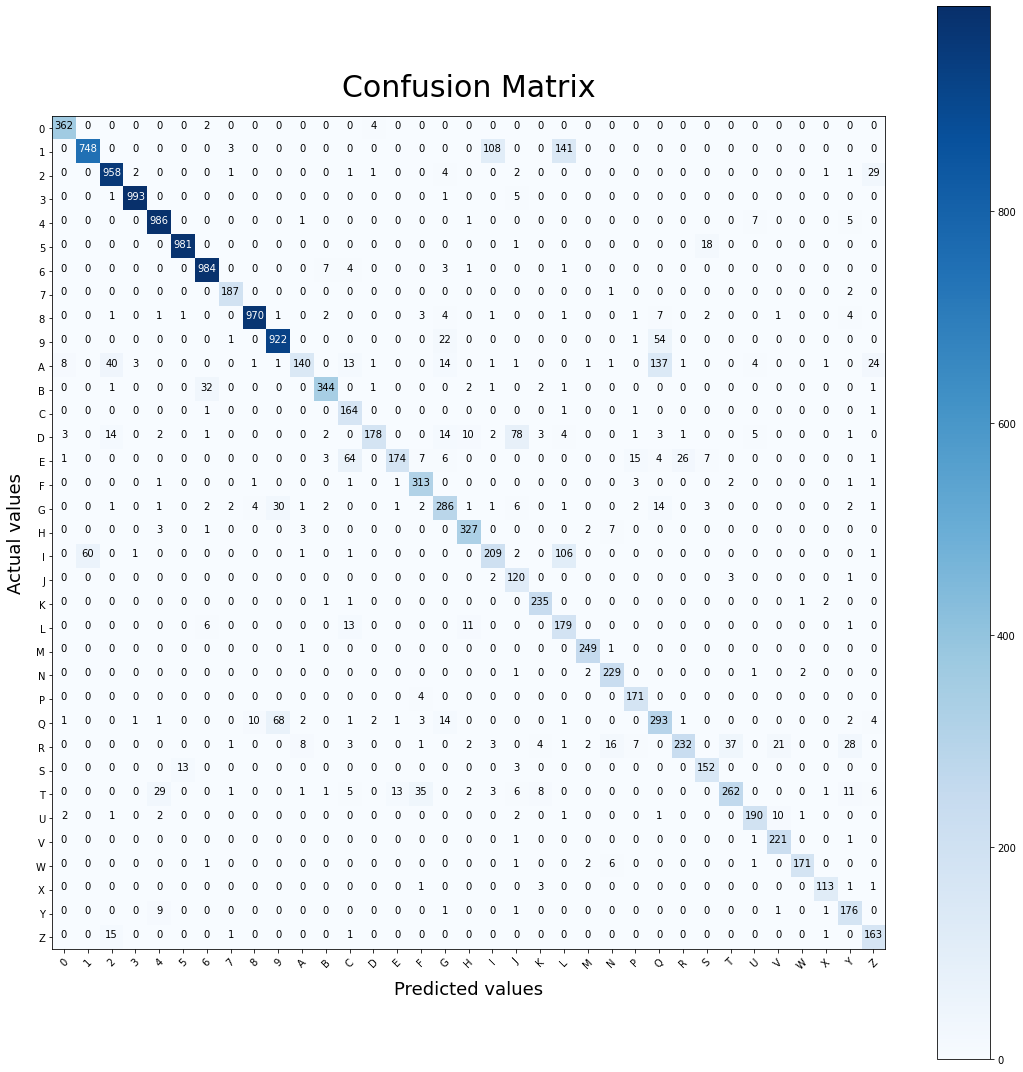

In [37]:
#cnf_matrix = confusion_matrix(val_Y.argmax(axis=1), y_pred.argmax(axis=1))
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 
                  'V', 'W', 'X', 'Y', 'Z']
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)
plt.show()

## Testing Stage
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [38]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [39]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [40]:
def get_word(letter):
    word = "".join(letter)
    return word

BEWES


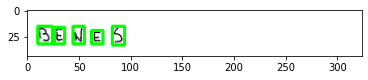

In [59]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\train_v2\train\TRAIN_00003.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

R0MAIN


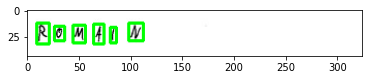

In [49]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\train_v2\train\TRAIN_00020.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

MAUPAS


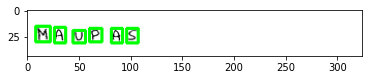

In [55]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\train_v2\train\TRAIN_00040.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

JE2NUMICHEL


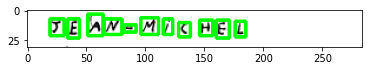

In [43]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\validation_v2\validation\VALIDATION_0010.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)

1ENA


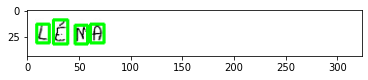

In [44]:
letter,image = get_letters(r'(your drive name):/(your name)/(your folder)/(your folder)\test_v2\test\TEST_0003.jpg')
word = get_word(letter)
print(word)
plt.imshow(image)